In [1]:
import numpy as np
import pandas as pd

In [2]:
data_set = pd.read_csv('/content/train (1).csv')

In [3]:
data_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data_set.shape

(1460, 81)

In [7]:
data_set['HouseStyle'].tail(50)

1410    2Story
1411    1.5Fin
1412    1Story
1413    1Story
1414    1.5Fin
1415    1Story
1416    2Story
1417    2Story
1418    1Story
1419    1Story
1420    2Story
1421    1Story
1422    1Story
1423      SLvl
1424    1Story
1425    1Story
1426    2Story
1427    1.5Fin
1428    1Story
1429    1Story
1430    2Story
1431    1Story
1432    1Story
1433    2Story
1434    1Story
1435    1Story
1436    1Story
1437    1Story
1438    1Story
1439      SLvl
1440    2.5Fin
1441    1Story
1442    2Story
1443    1.5Unf
1444    1Story
1445    SFoyer
1446    1Story
1447    2Story
1448    2Story
1449    SFoyer
1450    2Story
1451    1Story
1452      SLvl
1453    1Story
1454    1Story
1455    2Story
1456    1Story
1457    2Story
1458    1Story
1459    1Story
Name: HouseStyle, dtype: object

In [5]:
data_set.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [43]:
Required_data = data_set.loc[ : ,['Id','MSSubClass','LotFrontage','LotArea','SaleCondition']]

In [44]:
Required_data

,Id,MSSubClass,LotFrontage,LotArea,SaleCondition
0,1,60,65.0,8450,Normal
1,2,20,80.0,9600,Normal
2,3,60,68.0,11250,Normal
3,4,70,60.0,9550,Abnorml
4,5,60,84.0,14260,Normal
...,...,...,...,...,...
1455,1456,60,62.0,7917,Normal
1456,1457,20,85.0,13175,Normal
1457,1458,70,66.0,9042,Normal
1458,1459,20,68.0,9717,Normal


In [13]:
import seaborn as sns

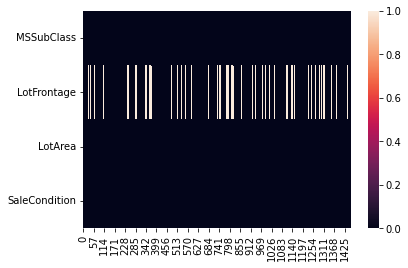

In [14]:
sns.heatmap(Required_data.isna().transpose())

In [15]:
Required_data.isna().sum()/len(Required_data)

MSSubClass       0.000000
LotFrontage      0.177397
LotArea          0.000000
SaleCondition    0.000000
dtype: float64

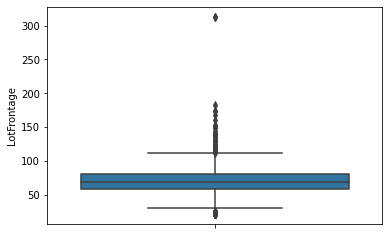

In [17]:
sns.boxplot(y = Required_data['LotFrontage'])

In [68]:
Required_data.LotFrontage = Required_data.LotFrontage.fillna(Required_data.LotFrontage.median())

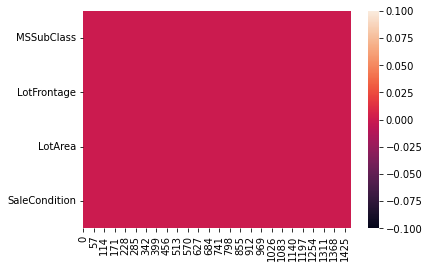

In [19]:
sns.heatmap(Required_data.isna().transpose())

In [20]:
Required_data.isna().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
SaleCondition    0
dtype: int64

In [21]:
Required_data.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [48]:
from sklearn import preprocessing

In [49]:
label_encoder = preprocessing.LabelEncoder()

In [50]:
Required_data.SaleCondition = label_encoder.fit_transform(Required_data.SaleCondition)

In [51]:
Required_data.head(50)

,Id,MSSubClass,LotFrontage,LotArea,SaleCondition
0,1,60,65.0,8450,4
1,2,20,80.0,9600,4
2,3,60,68.0,11250,4
3,4,70,60.0,9550,0
4,5,60,84.0,14260,4
5,6,50,85.0,14115,4
6,7,20,75.0,10084,4
7,8,60,NaN,10382,4
8,9,50,51.0,6120,0
9,10,190,50.0,7420,4


In [69]:
x_train = Required_data.loc[:,:]

In [53]:
x_train.head()

,Id,MSSubClass,LotFrontage,LotArea,SaleCondition
0,1,60,65.0,8450,4
1,2,20,80.0,9600,4
2,3,60,68.0,11250,4
3,4,70,60.0,9550,0
4,5,60,84.0,14260,4


In [62]:
y_train = data_set.SalePrice

In [30]:
y_train.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [31]:
test_data = pd.read_csv('/content/test (1).csv')

In [32]:
test_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [55]:
Required_test_data = test_data.loc[ : ,['Id','MSSubClass','LotFrontage','LotArea','SaleCondition']]

In [34]:
Required_test_data.isna().sum()

MSSubClass         0
LotFrontage      227
LotArea            0
SaleCondition      0
dtype: int64

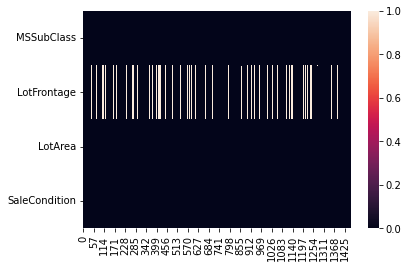

In [35]:
sns.heatmap(Required_test_data.isna().transpose())

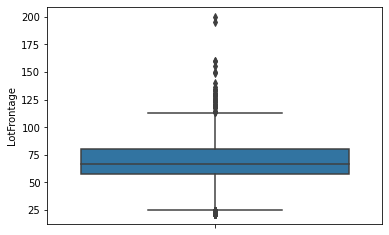

In [36]:
sns.boxplot(y=Required_test_data['LotFrontage'] )

In [70]:
Required_test_data.LotFrontage = Required_test_data.LotFrontage.fillna(Required_test_data.LotFrontage.median())

In [57]:
Required_test_data.SaleCondition = label_encoder.fit_transform(Required_test_data.SaleCondition)

In [39]:
Required_test_data.head(10)

,MSSubClass,LotFrontage,LotArea,SaleCondition
0,20,80.0,11622,4
1,20,81.0,14267,4
2,60,74.0,13830,4
3,60,78.0,9978,4
4,120,43.0,5005,4
5,60,75.0,10000,4
6,20,67.0,7980,4
7,60,63.0,8402,4
8,20,85.0,10176,4
9,20,70.0,8400,4


In [71]:
x_test = Required_test_data.loc[:, :]

In [59]:
from sklearn.linear_model import LinearRegression

In [65]:
model = LinearRegression()

In [72]:
model.fit(x_train,y_train)

LinearRegression()

In [73]:
y_pred = model.predict(x_test)

In [74]:
submission = pd.DataFrame({
    "Id": x_test["Id"],
    "SalePrice": y_pred
})

In [75]:
submission.to_csv("submission.csv", index=False)